In [4]:
# This R environment comes with all of CRAN preinstalled, as well as many other helpful packages
# The environment is defined by the kaggle/rstats docker image: https://github.com/kaggle/docker-rstats
# For example, here's several helpful packages to load in 

library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function
library(ggplot2)
library(dplyr)
library(tidytext)
library(tidyr)
library(tm)
library(wordcloud)
library(wordcloud2)
library(reshape2)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

system("ls ../input")

# Any results you write to the current directory are saved as output.


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: NLP

Attaching package: ‘NLP’

The following object is masked from ‘package:ggplot2’:

    annotate

Loading required package: RColorBrewer

Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths



In this data analysis project I will be analysing the dialogues of few characters from star wars episode 4,5 and 6. Each of the dataset is in form of text file and has 2 columns thr character name and the dialogue spoke by that character. To start things off I will first load the data from the text files into 3 different datasets.

In [2]:
ep4<-read.table('../input/SW_EpisodeIV.txt')
ep5<-read.table('../input/SW_EpisodeV.txt')
ep6<-read.table('../input/SW_EpisodeVI.txt')

I will first analyze episode 4 data.

To do this analysis I will do the below steps to create wordcloud of the words in the episode 4/5/6

*  Create a corpus of words from the column in the dataframe on which we want to create wordcloud

*  Clean the corpus by applying the below functions from base R and tm package.

    *  removePunctuation() This function is used to remove punctuations.
    *  stripWhitespace(). Remove excess whitespace
    *  tolower(). Make all characters lowercase
    *  removeWords(). Remove some common English stop words (“I”, “she’ll”, “the”, etc.)
    *  removeNumbers(). Remove numbers

*  Once the corpus has been cleaned conver this to a document term matrix which will be used for analysis

*  Remove sparse terms from the document term matrix to make the DTM feasible for analysis

*  Convert the above Document term matrix to a Matrix in R

*  Convert the matrix from the above step to a Data frame with columns word and word frequency

*  Create a word cloud on the dataframe createdd above

So to do all these steps I will create 2 functions

cleancorpus which will have all the functions used to clean the corpus

createterms which will create a function which takes the column on which we intend to create wordcloud and gives output a dataframe which contains word and word frequency.

And finally we can use the output of the createterms function to create wordcloud

So to begin with, I will be creating cleancorpus function

In [5]:
#creating a vector of words which are stopwords

stop_words<-c(stopwords("english"),c("thats","weve","hes","theres","ive","will","can","cant","dont","youve","youre","youll","theyre","whats","didnt","us"))

#creating  clean corpus function

cleancorpus<- function(corpus){

#removes punctuation
  
corpus <- tm_map(corpus,removePunctuation)

#removes whitespaces

corpus <- tm_map(corpus,stripWhitespace)

#converts all strings to lowercase

corpus <- tm_map(corpus,content_transformer(tolower))

#removes stopwords

corpus <- tm_map(corpus,removeWords,stop_words)

#removes numbers

corpus <- tm_map(corpus,removeNumbers)

#returns clean corpus

return(corpus)
}

Creating a createterms functions

In [6]:
createterms <- function(text){

#creating createterms function , it takes text column as input and gives a dataframe with term and term frequency as outut  

#creating a corpus from the text column 
  
df_corp <- VCorpus(VectorSource(text))  

#Cleaning the corpus using the cleancorpus function

df_corp_clean <- cleancorpus(df_corp)

#Creating a  term document matrix

df_tdm <- TermDocumentMatrix(df_corp_clean)

#Removing sparse terms from the TermDocumentMatrix

df_tdm <- removeSparseTerms(df_tdm,sparse = 0.99)

#Converting the TermDocumentMatrix to a Matrix in R

df_m <- as.matrix(df_tdm)
  
#convering matrix to data frame with terms and term frequency  

word_freq = sort(rowSums(df_m), decreasing=T)

df <- data.frame(word = names(word_freq),freq = word_freq)


#return the dataframe 
return(df)

}

Generating word cloud in R using the createterms function.

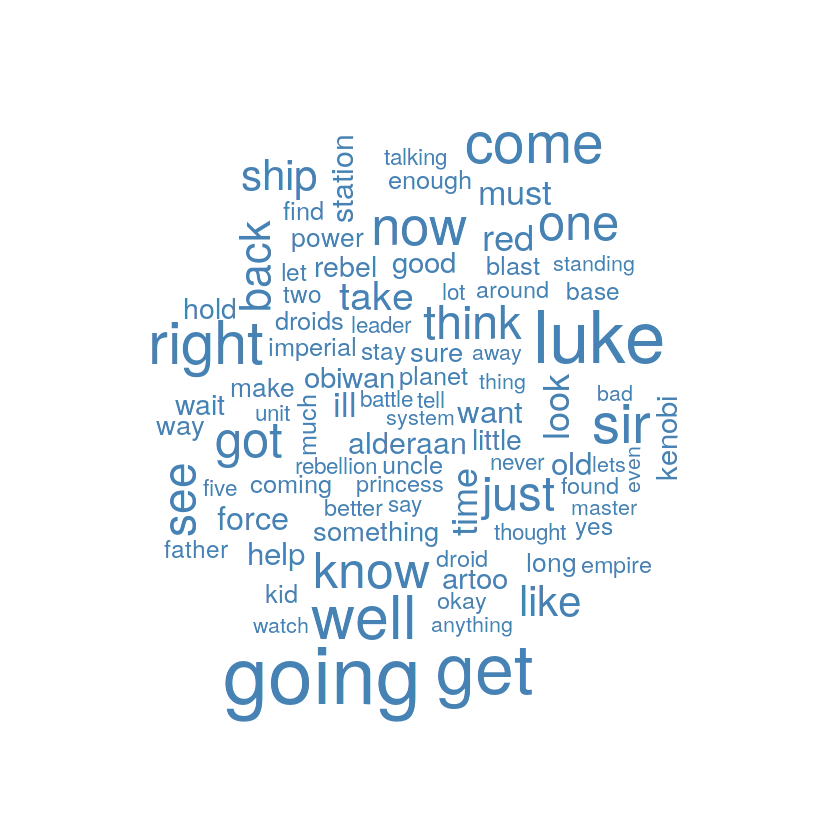

In [15]:
df<-createterms(ep4$dialogue)
wordcloud(df$word,df$freq,max.words=100,color="steelblue")

In [ ]:
#look at the structure of the dataframe

str(ep4)

Both the columns are of factor data type, I will be converting these into character data types.

In [16]:
#converting columns to character

ep4$character <- as.character(ep4$character)
ep4$dialogue <- as.character(ep4$dialogue)

#checking if the conversion has been applied successfully.

str(ep4)

'data.frame':	1010 obs. of  2 variables:
 $ character: chr  "THREEPIO" "THREEPIO" "THREEPIO" "THREEPIO" ...
 $ dialogue : chr  "Did you hear that?  They've shut down the main reactor.  We'll be destroyed for sure.  This is madness!" "We're doomed!" "There'll be no escape for the Princess this time." "What's that?" ...


Now, I will find out the number of dialogues for each character and before doing that I want to check number of characters in episode 4

In [17]:
#number of unique characters in star wars episode 4

length(unique(ep4$character))

[1] 60

There are 60 characters in episode 4. Now Let’s proceed to find out the characters with most number of dialogues.

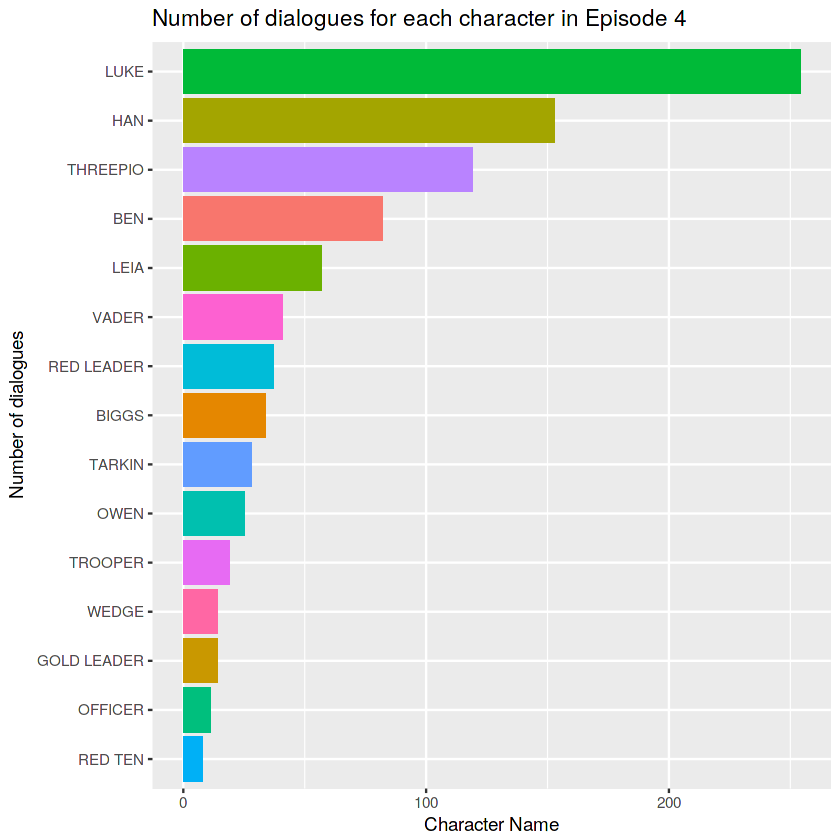

In [18]:
ep4%>%
  group_by(character)%>%
  count()%>%
  ungroup()%>%
  arrange(desc(n))%>%
  top_n(15,n)%>%
  ggplot(aes(reorder(character,n),n,fill=character))+
  geom_col(show.legend = F)+
  coord_flip()+
  labs(x="Number of dialogues" , y="Character Name" , title ="Number of dialogues for each character in Episode 4")

I will repeat the same steps for doing analysis on the episode 5 of star wars.

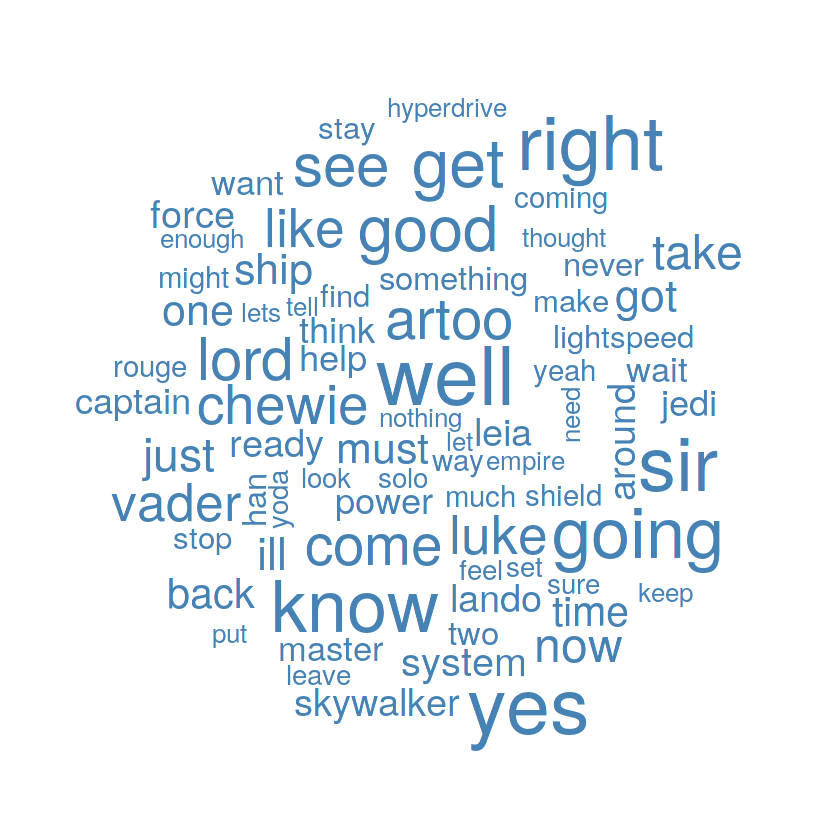

In [19]:
df_ep5 <- createterms(ep5$dialogue)

wordcloud(df_ep5$word,df_ep5$freq,max.words=100,color="steelblue")

Now let’s look at the number of dialogues spoken by each character in episode 5 of star wars.

In [20]:
#look at the structure of the dataframe

str(ep5)

'data.frame':	839 obs. of  2 variables:
 $ character: Factor w/ 49 levels "ANNOUNCER","ASSISTANT OFFICER",..: 24 14 24 14 24 24 24 14 14 35 ...
 $ dialogue : Factor w/ 818 levels "...and that, Lord Vader, was the last time they  appeared in any of our scopes. Considering the amount of damag"| __truncated__,..: 144 358 692 620 504 204 7 99 26 546 ...


Both the columns are of factor data type, I will be converting these into character data types.

In [21]:
#converting columns to character

ep5$character <- as.character(ep5$character)
ep5$dialogue <- as.character(ep5$dialogue)

#checking if the conversion has been applied successfully.

str(ep5)

'data.frame':	839 obs. of  2 variables:
 $ character: chr  "LUKE" "HAN" "LUKE" "HAN" ...
 $ dialogue : chr  "Echo Three to Echo Seven. Han, old buddy, do you  read me?" "Loud and clear, kid. What's up?" "Well, I finished my circle. I don't pick up any  life readings." "There isn't enough life on this ice cube to fill a  space cruiser. The sensors are placed. I'm going back." ...


Now, I will find out the number of dialogues for each character and before doing that I want to check number of characters in episode 5

In [22]:
#number of unique characters in star wars episode 5

length(unique(ep5$character))

[1] 49

There are 49 unique characters in episode 5. Now Let’s proceed to find out the characters with most number of dialogues.

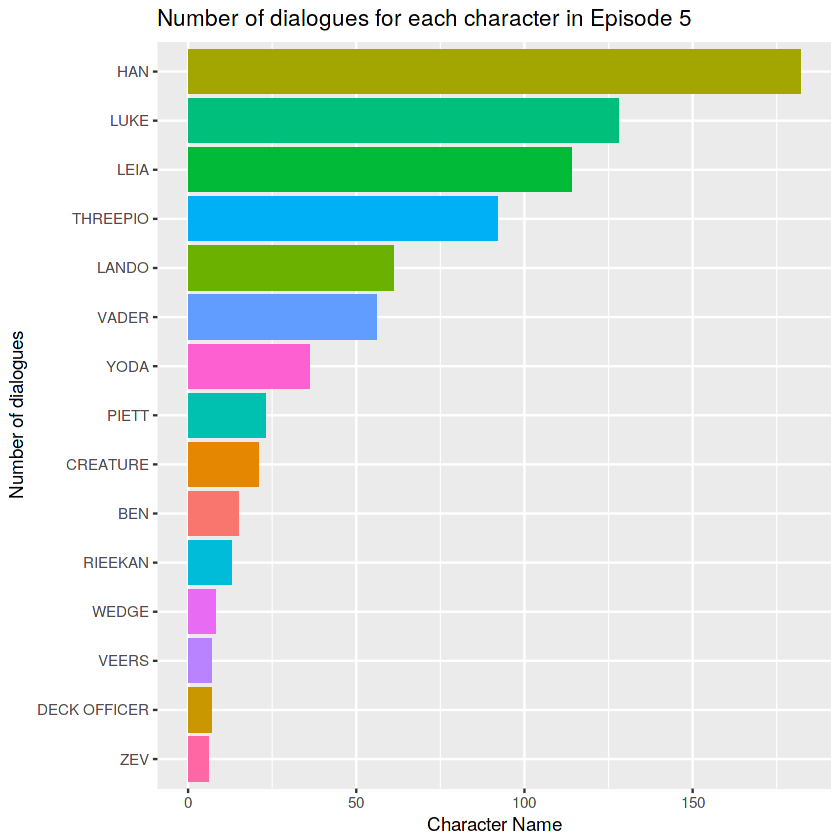

In [23]:
ep5%>%
  group_by(character)%>%
  count()%>%
  ungroup()%>%
  arrange(desc(n))%>%
  top_n(15,n)%>%
  ggplot(aes(reorder(character,n),n,fill=character))+
  geom_col(show.legend = F)+
  coord_flip()+
  labs(x="Number of dialogues" , y="Character Name" , title ="Number of dialogues for each character in Episode 5")

Creating word loud and doing text analysis on episode 6.

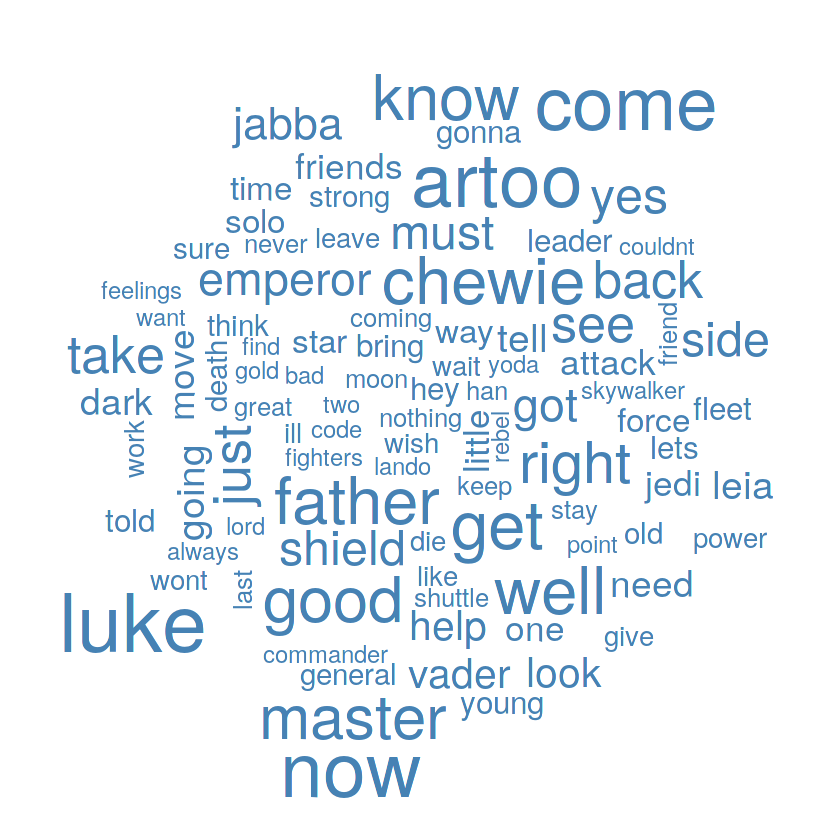

In [24]:
df_ep6<-createterms(ep6$dialogue)
wordcloud(df_ep6$word,df_ep6$freq,max.words=100,color="steelblue")

Now let’s look at the number of dialogues spoken by each character in episode 6 of star wars.

In [25]:
#look at the structure of the dataframe

str(ep6)

'data.frame':	674 obs. of  2 variables:
 $ character: Factor w/ 53 levels "ACKBAR","ANAKIN",..: 44 10 44 28 30 20 48 20 48 20 ...
 $ dialogue : Factor w/ 665 levels "... and a gift.  Gift, what gift?",..: 89 498 561 280 613 328 632 199 424 236 ...


Both the columns are of factor data type, I will be converting these into character data types.

In [26]:
#converting columns to character

ep6$character <- as.character(ep6$character)
ep6$dialogue <- as.character(ep6$dialogue)

#checking if the conversion has been applied successfully.

str(ep6)

'data.frame':	674 obs. of  2 variables:
 $ character: chr  "SHUTTLE CAPTAIN" "DEATH STAR CONTROLLER" "SHUTTLE CAPTAIN" "OFFICER" ...
 $ dialogue : chr  "Command station, this is ST 321. Code Clearance Blue. We're starting our approach. Deactivate the security shield." "The security deflector shield will be deactivated when we have confirmation of your code transmission. Stand by"| __truncated__ "We're starting our approach." "Inform the commander that Lord Vader's shuttle has arrived." ...


Now, I will find out the number of dialogues for each character and before doing that I want to check number of characters in episode 6

In [27]:
#number of unique characters in star wars episode 6

length(unique(ep6$character))

[1] 53

There are 53 unique characters in episode 6. Now Let’s proceed to find out the characters with most number of dialogues.

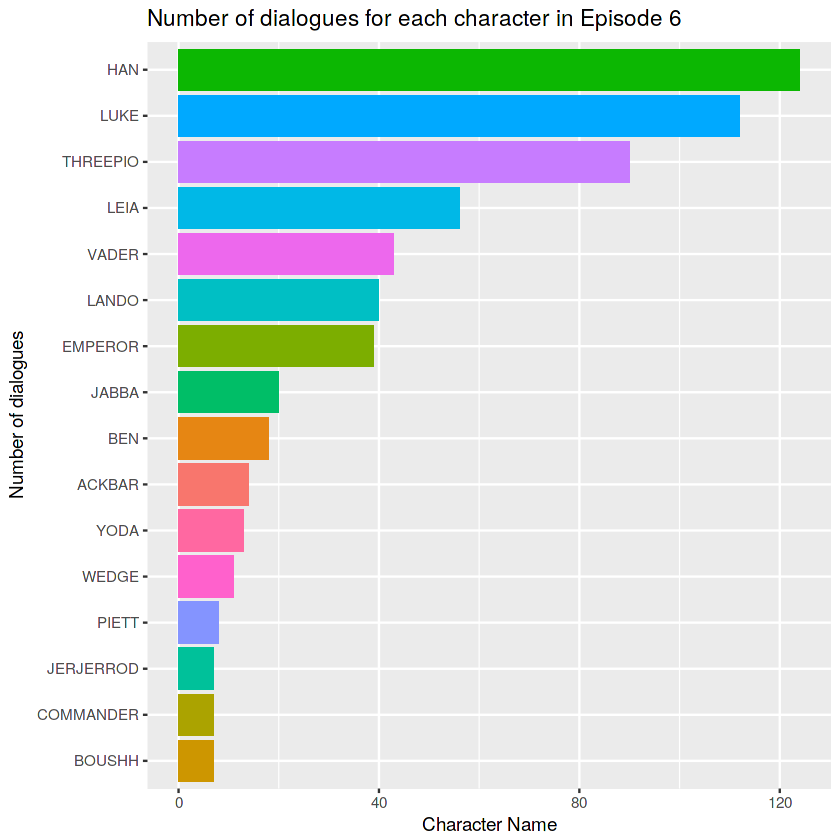

In [28]:
ep6%>%
  group_by(character)%>%
  count()%>%
  ungroup()%>%
  arrange(desc(n))%>%
  top_n(15,n)%>%
  ggplot(aes(reorder(character,n),n,fill=character))+
  geom_col(show.legend = F)+
  coord_flip()+
  labs(x="Number of dialogues" , y="Character Name" , title ="Number of dialogues for each character in Episode 6")

Now I want do some analysis on the words present in the text.

In [29]:
#adding filename variable in the episode data frame

ep4$episode <- 'ep4'
ep5$episode <- 'ep5'
ep6$episode <- 'ep6'
#combining all the 3 dataframes into 1

ep_full<- rbind(ep4,ep5,ep6)

Now to do text analysis I will break each word into a token by using unnest_tokens function from the tidytext package in R.

In [30]:
ep_full_tokens<-ep_full%>%
  unnest_tokens(word,dialogue)

Now I will remove the stopwords from the tokens by using an anti_join on **ep_full_tokens** with **stop_words** dataframe. Then I will Join this with **Bing lexicon ** to get the sentiment of words.

Since, **bing ** lexicon gives the I will use this to create a comparison cloud which help in understanding the most commonly used positive and negative words.

In [39]:
#creating stopword dataframe  from the stop_words vector

stopword<-data.frame(word=stop_words)
stopword$word <- as.character(stopword$word)

Warning message:
“Column `word` joining character vector and factor, coercing into character vector”

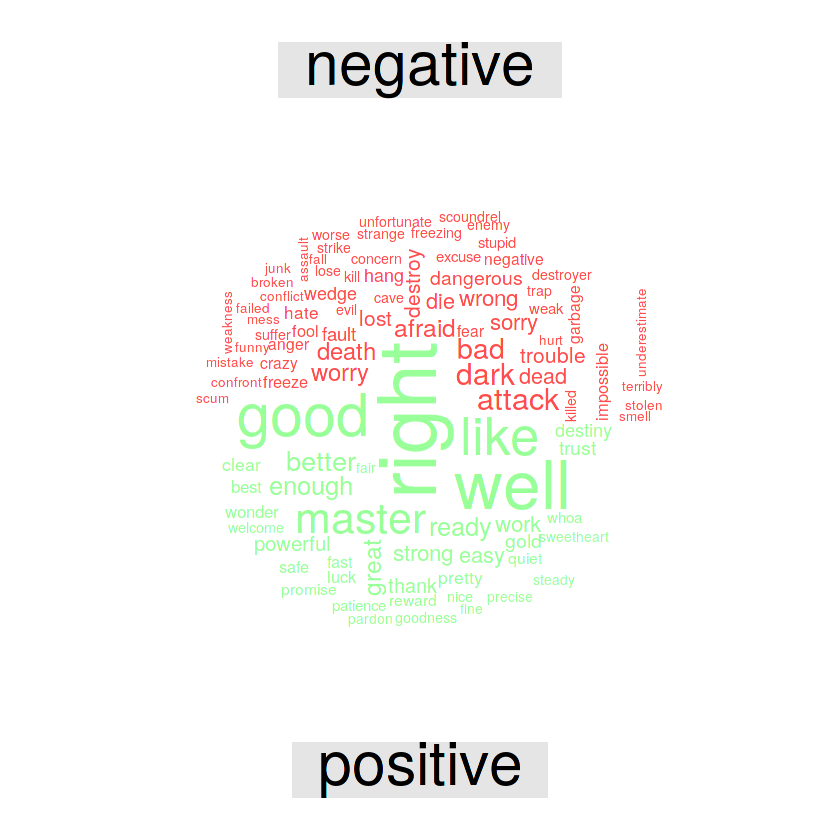

In [32]:
ep_full_tokens%>%
  anti_join(stopword, by ="word")%>%
  inner_join(get_sentiments("bing"),by="word")%>%
  count(word,sentiment,sort = TRUE)%>%
  acast(word~sentiment , value.var="n" , fill = 0)%>%
  comparison.cloud(colors = c("#FF4C4C","#99FF99"),max.words = 100)

Let’s see which episode has more positve and negative words.

In [33]:
ep_bing<-ep_full_tokens%>%
  anti_join(stopword, by ="word")%>%
  inner_join(get_sentiments("bing"),by="word")%>%
  count(episode,sentiment,sort = TRUE)

Warning message:
“Column `word` joining character vector and factor, coercing into character vector”

Converting the dataframe to wide format to get the ratio of positive to negative words in each episode.

In [34]:
ep_bing_wide<-dcast(ep_bing,episode~sentiment, value.var = "n")

Creating a variable with positive to negative word ratio.

In [35]:
ep_bing_wide%>%
  mutate(positivetonegativeratio= positive/negative)

episode,negative,positive,positivetonegativeratio
ep4,322,391,1.214286
ep5,269,338,1.256506
ep6,268,306,1.141791


It seems that as the episodes are progressing the ratio of positive words to negative words is increasing.

Now I want to analyze the positive to negative words ratio for each character in all the episodes.

In [40]:
character_bing<-ep_full_tokens%>%
  anti_join(stopword, by ="word")%>%
  inner_join(get_sentiments("bing"),by="word")%>%
  count(character,sentiment,sort = TRUE)%>%
  dcast(character~sentiment, value.var = "n",fill = -1)%>%
  mutate(positivetonegativeratio=positive/negative)%>%
  filter(positivetonegativeratio>0)%>%
  arrange(desc(positivetonegativeratio))

Creature and Trooper are the characters who have spoken more number of positive words as compared to negative words. Whereas, Ackbar and Mon Mothama have spoken more number of negative words than positive words.

Next I want to visualize how the trend of positive and negative words changes throuhput each of the episodes.

In [42]:
#creating line number variable for each line in each episode

tidy_episode <- ep_full%>%
  group_by(episode)%>%
  mutate(linenumber= row_number())%>%
  ungroup()%>%
  unnest_tokens(word,dialogue)

In [43]:
#creating an index variable which defines different subsegments of the episode

tidy_episode_sentiment <- tidy_episode%>%
  mutate(index= linenumber%/% 10)

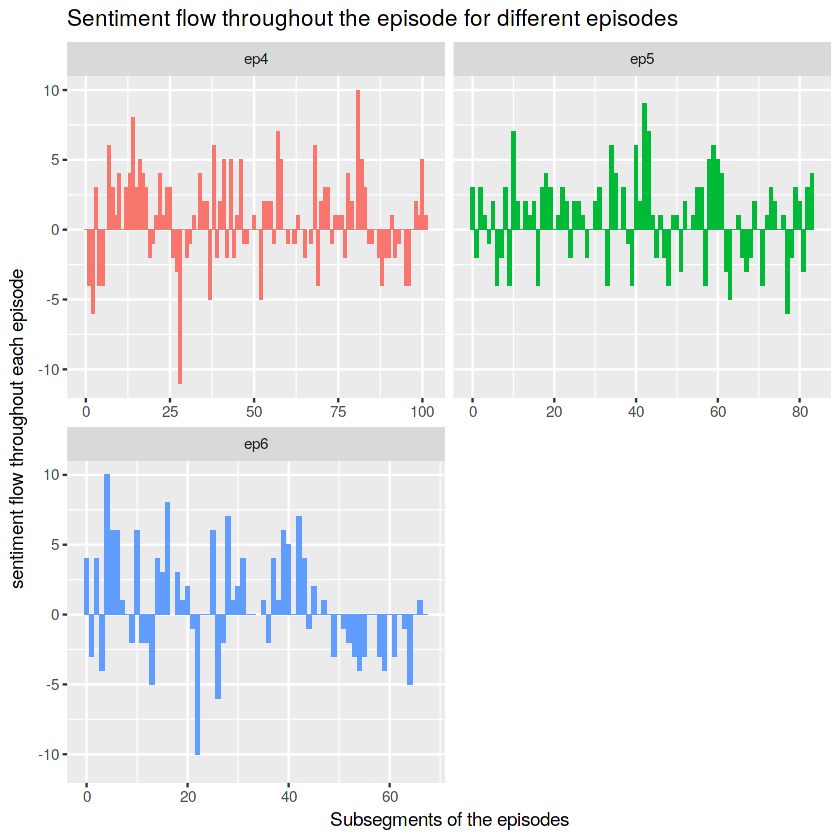

In [44]:
#Plotting the trend of sentiment flow in each of the star wars episodes

tidy_episode_sentiment%>%
  anti_join(stopword, by ="word")%>%
  inner_join(get_sentiments("bing"),by="word")%>%
  count(episode,index,sentiment)%>%
  spread(sentiment,n,fill=0)%>%
#finding the difference net sentiment
mutate(net_sentiment=positive-negative)%>%
ggplot(aes(index,net_sentiment,fill=episode))+
geom_col(show.legend = F)+
facet_wrap(~episode , ncol=2 , scales="free_x")+
labs(x="Subsegments of the episodes",y="sentiment flow throughout each episode",
     title="Sentiment flow throughout the episode for different episodes")